In [1]:
import numpy as np
from numpy import sin, cos, arccos, arctan2
from numpy.linalg import norm
import scipy.special
import scipy.integrate
import scipy.io
import scipy.optimize
import matplotlib
import matplotlib.pyplot as plt
import sympy as sp

from constants import *
from coordinates import ecef_eci, ecef2eci, eci2ecef
from force_models import dynamics, accelerations
from plotting import plot_eci, plot_forces
from symbolic_math import Htilde, evaluateH

Htilde_t0_true = scipy.io.loadmat('./problem_data_files/H_Tilde_t0.mat')['H_TILDA']

In [2]:
PNRW, PN, T_UT1, dEps, omega_vec, R, W = ecef_eci(init_epoch, return_extras = True)

rECEF, vECEF = eci2ecef(r_i, v_i, PNRW, PN, T_UT1, dEps, omega_vec, R, W)

def ECEF_range_and_rate(sECEF, stationECEF):
    rECEF, vECEF = sECEF[0:3], sECEF[3:6]
    r_station_to_sat = rECEF - stationECEF
    distance = norm(r_station_to_sat)
    u_station_to_sat = r_station_to_sat / distance
    rate = np.dot(vECEF, u_station_to_sat)
    return np.array([distance, rate])

def ECI_range_and_rate(sECI, stationECEF):
    PNRW, PN, T_UT1, dEps, omega_vec, R, W = ecef_eci(init_epoch, return_extras = True)
    rECEF, vECEF = eci2ecef(sECI[0:3], sECI[3:6], PNRW, PN, T_UT1, dEps, omega_vec, R, W)
    sECEF = np.concatenate([rECEF,vECEF,1.88*np.ones(1)])
    return ECEF_range_and_rate(sECEF, stationECEF)

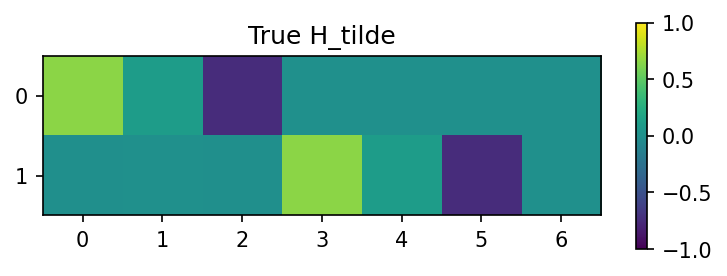

In [3]:
fig = plt.figure(figsize=(6,2),dpi=150)
color = plt.imshow(Htilde_t0_true)
plt.colorbar(color)
plt.clim(-1,1)
plt.title("True H_tilde")
plt.show()

In [4]:
sECI = np.concatenate([s_i, np.ones(1)*1.88])
sECEF = np.concatenate([*eci2ecef(r_i, v_i, PNRW, PN, T_UT1, dEps, omega_vec, R, W), np.ones(1)*1.88])

eci_rr = lambda s: ECI_range_and_rate(s, s_1)
ecef_rr = lambda s: ECEF_range_and_rate(s, s_1)

Htilde_t0_ECI = scipy.optimize.approx_fprime(sECI, eci_rr, epsilon=1e-5)
Htilde_t0_ECEF = scipy.optimize.approx_fprime(sECEF, ecef_rr, epsilon=1e-5)



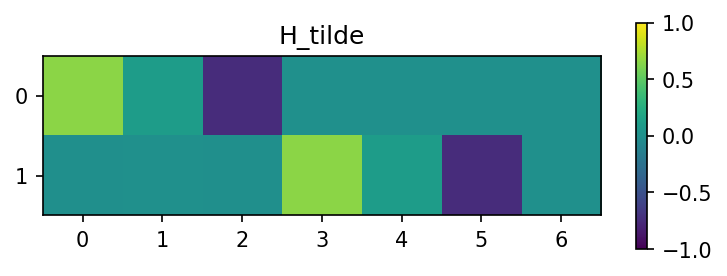

In [5]:
fig = plt.figure(figsize=(6,2),dpi=150)
color = plt.imshow(Htilde_t0_ECI)
plt.colorbar(color)
plt.clim(-1,1)
plt.title("H_tilde")
plt.show()

In [7]:
H = evaluateH(s_i, init_epoch, 1)

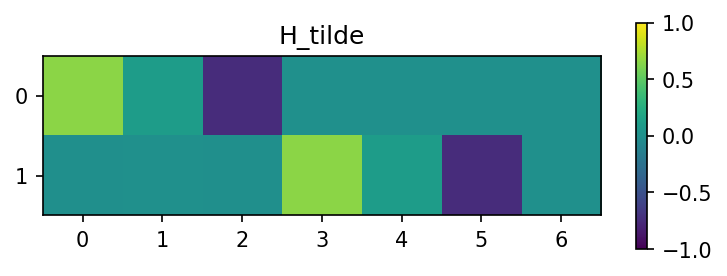

In [9]:
fig = plt.figure(figsize=(6,2),dpi=150)
color = plt.imshow(H)
plt.colorbar(color)
plt.clim(-1,1)
plt.title("H_tilde")
plt.show()

In [10]:
H - Htilde_t0_true

array([[-4.19751287e-06,  2.14889329e-05, -7.20188255e-07,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.13473716e-08, -3.29386906e-09,  7.29987113e-08,
        -4.19751287e-06,  2.14889329e-05, -7.20188255e-07,
         0.00000000e+00]])

In [11]:
reldiff = np.abs((H - Htilde_t0_true) / Htilde_t0_true)
reldiff = np.nan_to_num(reldiff)

/tmp/ipykernel_351592/3229493512.py:1: RuntimeWarning: invalid value encountered in divide
  reldiff = np.abs((H - Htilde_t0_true) / Htilde_t0_true)


/tmp/ipykernel_351592/1745118338.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20)


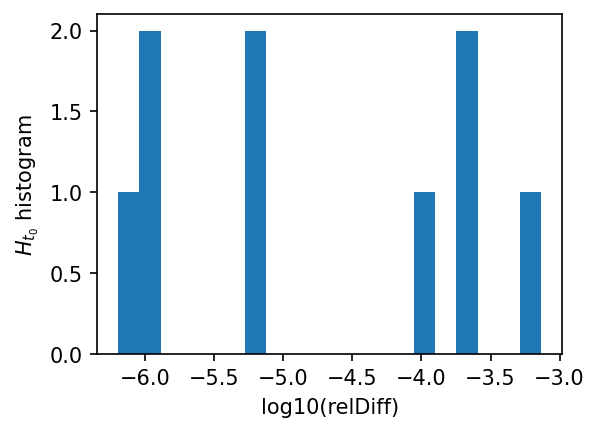

In [15]:
fig = plt.figure(figsize=(4,3),dpi=150)
plt.hist(np.nan_to_num(np.log10(reldiff.flatten()),posinf=np.nan, neginf=np.nan),bins=20)
plt.ylabel('$H_{t_0}$ histogram')
plt.xlabel('log10(relDiff)')
plt.show()

In [18]:
Htilde_t0_true

array([[ 6.53470716e-01,  1.02498574e-01, -7.49980043e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.23151547e-04,  5.15759359e-03, -9.94780022e-05,
         6.53470716e-01,  1.02498574e-01, -7.49980043e-01,
         0.00000000e+00]])

In [19]:
H

array([[ 6.53466519e-01,  1.02520063e-01, -7.49980763e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-9.23242895e-04,  5.15759029e-03, -9.94050035e-05,
         6.53466519e-01,  1.02520063e-01, -7.49980763e-01,
         0.00000000e+00]])

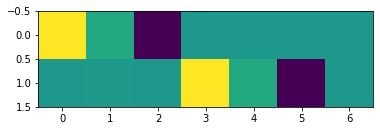

In [20]:
plt.imshow(H)